In [50]:
import qiskit
from qiskit import IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit import Aer
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qiskit.visualization import plot_histogram

backend = BasicAer.get_backend('unitary_simulator')

In [29]:
%config InlineBackend.figure_format = 'svg'

In [13]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [37]:

q=QuantumRegister(2)

In [38]:
#Building the circuit

qc = QuantumCircuit(q)
qc.ry(pi/2,q[0])
qc.rx(pi,q[0])
qc.ry(-pi/2,q[0])
qc.ry(pi/2,q[0])
qc.cx(q[0],q[1])

In [40]:
#Adding classical registers to measure

cr = ClassicalRegister(2,'classicalreg')
qc.add_register(cr)
qc.measure(q[0],cr[0])
qc.measure(q[1],cr[1])

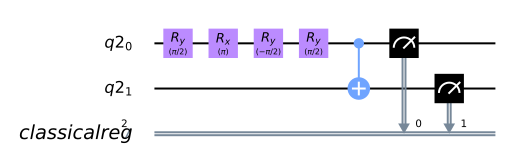

In [41]:
qc.draw(output='mpl')

In [28]:
job=execute(qc,backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]])

In [55]:
#sample run on simulator for 100 iterations

emulator = Aer.get_backend('qasm_simulator')

job = execute( qc, emulator, shots=100 )

In [56]:
hist = job.result().get_counts()
print(hist)

{'00': 41, '11': 59}


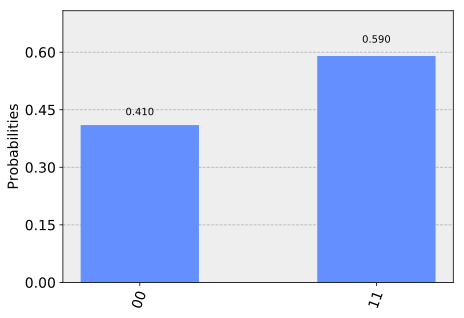

In [57]:
plot_histogram( hist )

In [ ]:

provider = IBMQ.enable_account('API_TOKEN_FOR_IBMQ_BACKEND')

In [76]:
#selecting backend
#Replace ibmq_essex with the desired backend Quantum Computer
backend = provider.get_backend('ibmq_essex')

In [77]:
job = execute( qc, backend, shots=100 )

In [78]:
hist = job.result().get_counts()
print(hist)

{'00': 38, '11': 53, '01': 6, '10': 3}


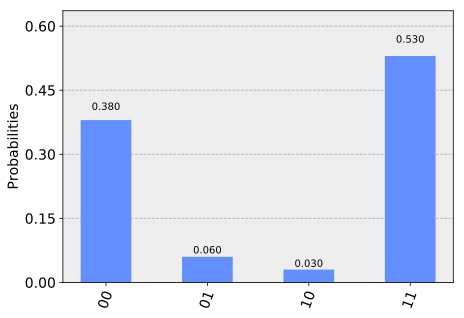

In [79]:
plot_histogram( hist )

In [86]:
shot=[1,10,100,1000]
outputs=[]
for i in shot:
    job = execute( qc, backend, shots=i )
    hist = job.result().get_counts()
    outputs.append(hist)
    print(hist)

{'00': 1}
{'00': 4, '11': 6}
{'00': 46, '11': 47, '01': 4, '10': 3}
{'00': 458, '11': 479, '01': 37, '10': 26}


In [ ]:
#Comparing outputs for different number of iterations 

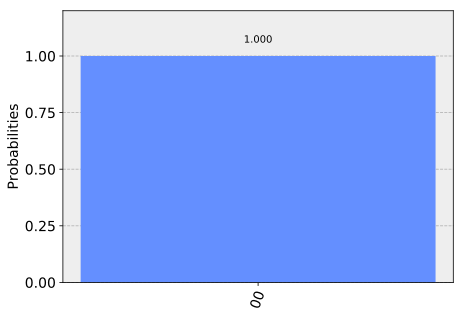

In [90]:
plot_histogram(outputs[0])

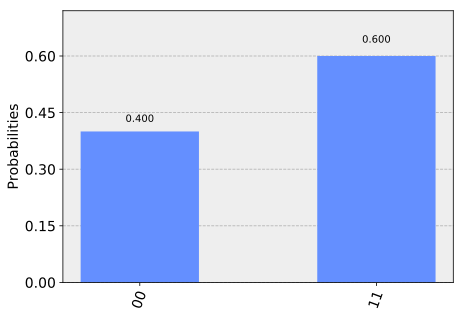

In [91]:
plot_histogram(outputs[1])

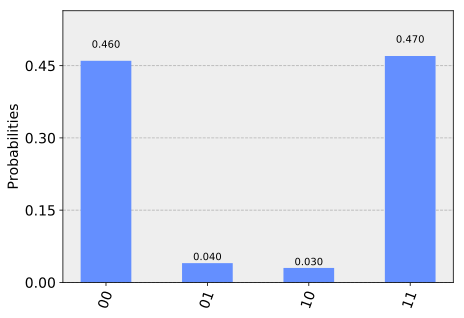

In [92]:
plot_histogram(outputs[2])

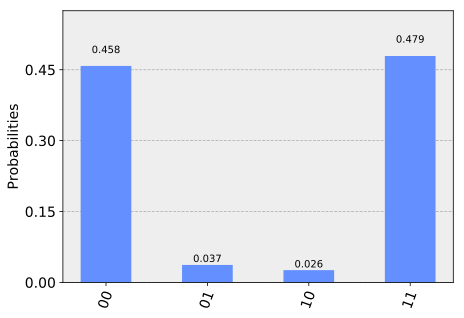

In [94]:
plot_histogram(outputs[3])

In [ ]:
#Observation : Accuracy increases with the increase in number of iterations.

In [ ]:
'''
Bonus Question : How to make sure you produce state |00>+|11> and not |00>-|11> ?
Answer : A bell state can be defined by the following equation

B(x,y) = ( |0,y> + (-1)^x |1,y*> ) / sqrt(2)
where y* is the opposite of y , eg. for y=1, y*=0 and vice versa

for producing |00>+|11> state only put x=0 and y=0
i.e. Both the qubits(in a two qubit system) should be zero
'''